### UCI Adult Income - exploratory and data analysis¶
This notebook is focused on the exploratory analysis od the cleaned version of the UCI Adult income dataset

In [2]:
import os
import pandas as pd 
import numpy as np
import plotly.express as px

### Define and creative path

In [3]:
#get working directories
current_dir = os.getcwd() 
#Go one directory up to the root directory
project_root_dir = os.path.dirname(current_dir) 
project_root_dir
# Define paths to the data folders
data_dir = os.path.join(project_root_dir, "Data")
raw_dir = os.path.join(data_dir, "raw")
processed_dir = os.path.join(data_dir, "processed")
# Define paths to results folder
results_dir = os.path.join(project_root_dir, "results")
#define paths to the docs folder
docs_dir = os.path.join(project_root_dir,"docs")

# Creates directories if they do not exist
os.makedirs(raw_dir, exist_ok = True)
os.makedirs(processed_dir, exist_ok = True)
os.makedirs(results_dir, exist_ok = True)
os.makedirs(docs_dir, exist_ok = True)

### read in the data

In [4]:
adult_data_filename = os.path.join(processed_dir, "adult_cleaned.csv")
adult_df = pd.read_csv(adult_data_filename)
adult_df.head(10)

,age,workclass,fnlwght,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income,education_level,occupation_group,continent,age_group
0,39,government,77516,13,single,single,white,male,2174,0,40,<=50k,tertiary,white collar,north america,36-45
1,50,self-employed,83311,13,married,male spouse,white,male,0,0,13,<=50k,tertiary,white collar,north america,46-60
2,38,private,215646,9,divorced or separated,single,white,male,0,0,40,<=50k,secondary-school graduate,blue collar,north america,36-45
3,53,private,234721,7,married,male spouse,black,male,0,0,40,<=50k,secondary school,blue collar,north america,46-60
4,28,private,338409,13,married,female spouse,black,female,0,0,40,<=50k,tertiary,white collar,central america,26-35
5,37,private,284582,14,married,female spouse,white,female,0,0,40,<=50k,tertiary,white collar,north america,36-45
6,49,private,160187,5,divorced or separated,single,black,female,0,0,16,<=50k,secondary school,service,central america,46-60
7,52,self-employed,209642,9,married,male spouse,white,male,0,0,45,>50k,secondary-school graduate,white collar,north america,46-60
8,31,private,45781,14,single,single,white,female,14084,0,50,>50k,tertiary,white collar,north america,26-35
9,42,private,159449,13,married,male spouse,white,male,5178,0,40,>50k,tertiary,white collar,north america,36-45


### check the shape of rhe dataset and datatypes

In [5]:
adult_df.shape

(32513, 16)

In [6]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32513 entries, 0 to 32512
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32513 non-null  int64 
 1   workclass         32513 non-null  object
 2   fnlwght           32513 non-null  int64 
 3   education_num     32513 non-null  int64 
 4   marital_status    32513 non-null  object
 5   relationship      32513 non-null  object
 6   race              32513 non-null  object
 7   sex               32513 non-null  object
 8   capital_gain      32513 non-null  int64 
 9   capital_loss      32513 non-null  int64 
 10  hours_per_week    32513 non-null  int64 
 11  income            32513 non-null  object
 12  education_level   32513 non-null  object
 13  occupation_group  32513 non-null  object
 14  continent         32513 non-null  object
 15  age_group         32513 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.0+ MB


### summary statistics
Numerical variables

In [7]:
adult_df.describe()

,age,fnlwght,education_num,capital_gain,capital_loss,hours_per_week
count,32513.000000,3.251300e+04,32513.000000,32513.000000,32513.000000,32513.000000
mean,38.590256,1.897942e+05,10.081629,1079.239812,87.432719,40.440962
std,13.638932,1.055788e+05,2.572015,7390.625650,403.243596,12.350184
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### categorical variables

In [8]:
adult_df.describe(include='object')

,workclass,marital_status,relationship,race,sex,income,education_level,occupation_group,continent,age_group
count,32513,32513,32513,32513,32513,32513,32513,32513,32513,32513
unique,7,5,5,5,2,2,7,5,6,7
top,private,married,male spouse,white,male,<=50k,secondary-school graduate,white collar,north america,26-35
freq,22650,14961,13178,27771,21758,24677,10484,16532,30018,8501


In [10]:
adult_df['workclass'].value_counts(normalize=True)

workclass
private          0.696644
self-employed    0.112447
government       0.069418
local-gov        0.064374
unknown          0.056470
voluntary        0.000431
unemployed       0.000215
Name: proportion, dtype: float64

In [11]:
adult_df['marital_status'].value_counts(normalize=True)

marital_status
married                  0.460154
single                   0.327684
divorced or separated    0.180912
widowed                  0.030542
married-af-spouse        0.000707
Name: proportion, dtype: float64

In [12]:
adult_df['relationship'].value_counts(normalize=True)

relationship
male spouse          0.405315
single               0.360686
child                0.155599
female spouse        0.048227
extended relative    0.030173
Name: proportion, dtype: float64

In [13]:
adult_df['race'].value_counts(normalize=True)

race
white                 0.854151
black                 0.096023
asian-pac-islander    0.031926
amer-indian-eskimo    0.009565
other                 0.008335
Name: proportion, dtype: float64

### income distribution

In [18]:
adult_df_income = adult_df.groupby('income').size().reset_index(name='total')
adult_df_income

,income,total
0,<=50k,24677
1,>50k,7836


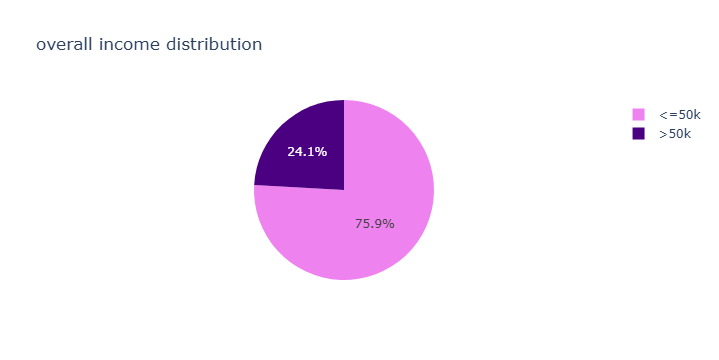

In [22]:
fig = px.pie(adult_df_income,names='income',values='total',title= 'overall income distribution',color_discrete_sequence=["violet","indigo"])
fig.show()

### income by age group

In [25]:
adult_df_income_age= adult_df.groupby(['age_group','income']).size().reset_index(name='total_by_age').sort_values(['age_group','income'])
adult_df_income_age

,age_group,income,total_by_age
0,18-25,<=50k,5333
1,18-25,>50k,114
2,26-35,<=50k,6910
3,26-35,>50k,1591
4,36-45,<=50k,5230
5,36-45,>50k,2771
6,46-60,<=50k,4479
7,46-60,>50k,2809
8,61-75,<=50k,1580
9,61-75,>50k,511


In [29]:
total_per_group= adult_df_income_age.groupby('age_group')['total_by_age'].transform('sum')
total_per_group

0     5447
1     5447
2     8501
3     8501
4     8001
5     8001
6     7288
7     7288
8     2091
9     2091
10     240
11     240
12     945
Name: total_by_age, dtype: int64

In [30]:
total_per_group= adult_df_income_age.groupby('age_group')['total_by_age'].transform('sum')
adult_df_income_age['percentage']=(adult_df_income_age['total_by_age']/total_per_group)*100
adult_df_income_age

,age_group,income,total_by_age,percentage
0,18-25,<=50k,5333,97.907105
1,18-25,>50k,114,2.092895
2,26-35,<=50k,6910,81.284555
3,26-35,>50k,1591,18.715445
4,36-45,<=50k,5230,65.366829
5,36-45,>50k,2771,34.633171
6,46-60,<=50k,4479,61.457190
7,46-60,>50k,2809,38.542810
8,61-75,<=50k,1580,75.561932
9,61-75,>50k,511,24.438068


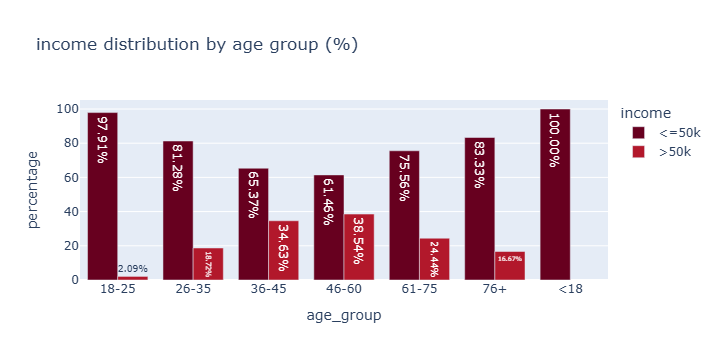

In [34]:
fig= px.bar(
    adult_df_income_age,
    x='age_group',
    y='percentage',
    color='income',
    title='income distribution by age group (%)', 
    barmode='group', 
    color_discrete_sequence=px.colors.sequential.RdBu,
    text='percentage'
) 
fig.update_traces(texttemplate='%{text:.2f}%')
fig.show()

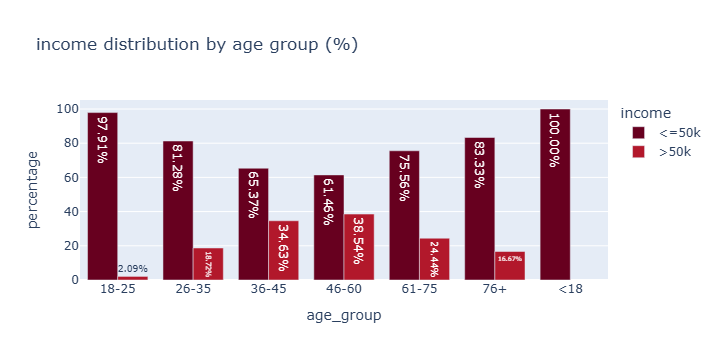

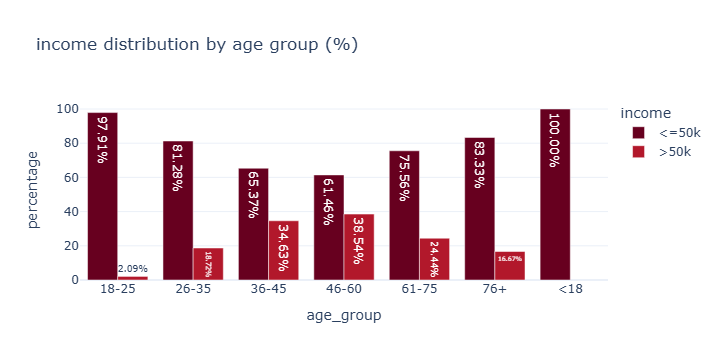

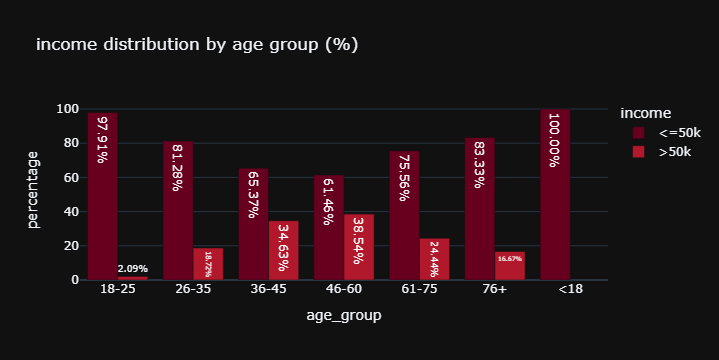

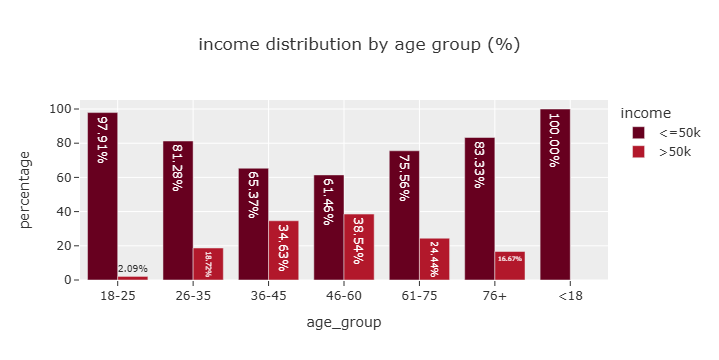

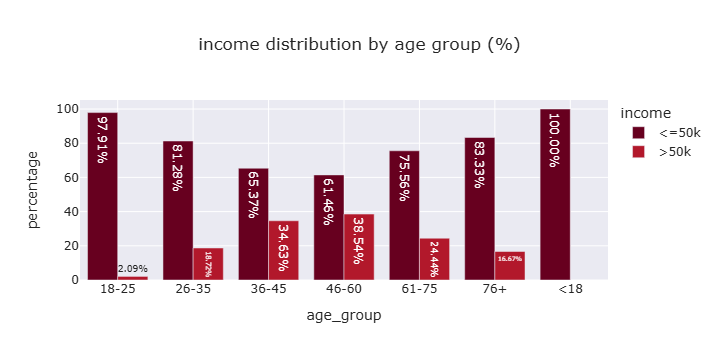

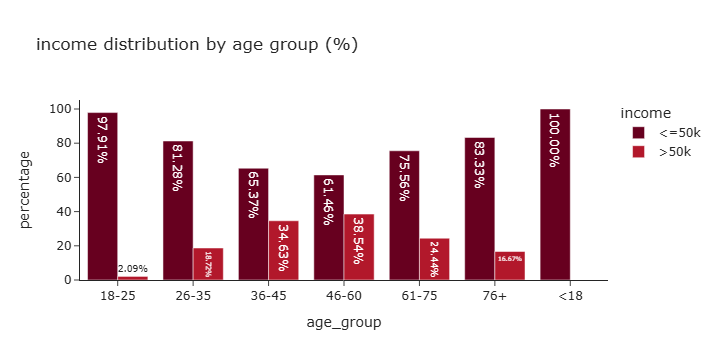

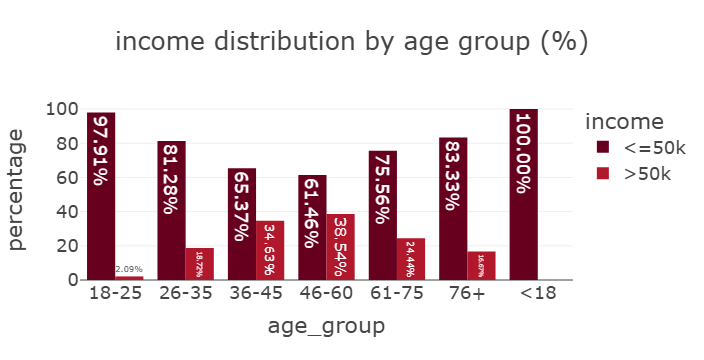

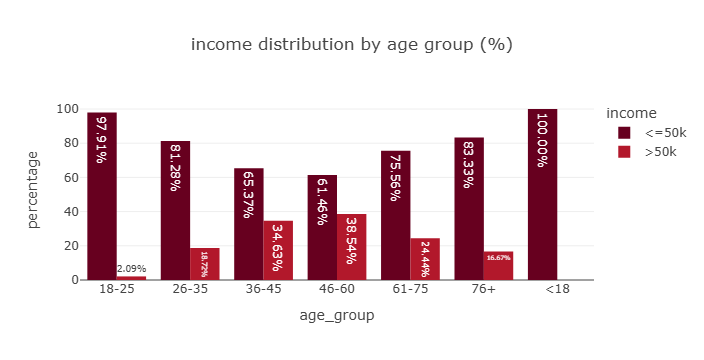

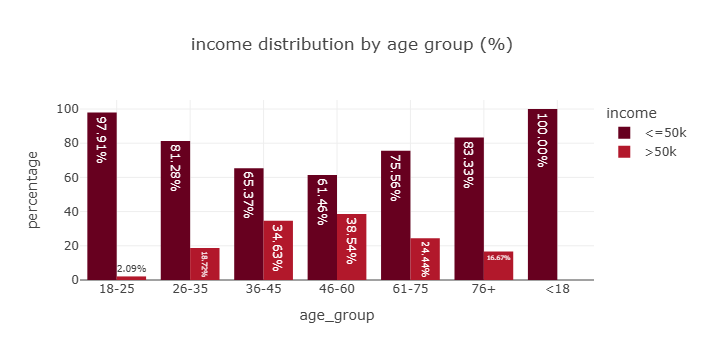

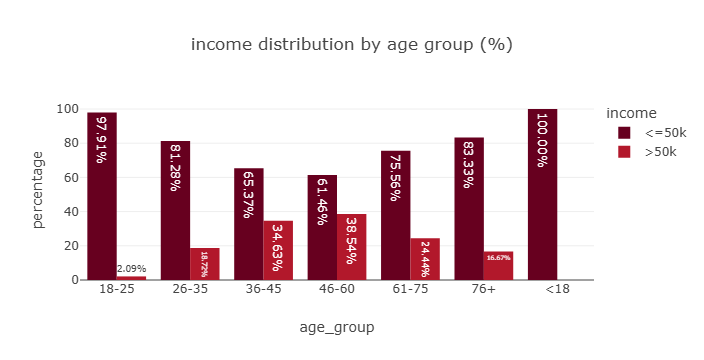

In [39]:
themes= ["plotly","plotly_white","plotly_dark","ggplot2","seaborn","simple_white","presentation","xgridoff","gridon","none"]
for theme in themes: 
    fig.update_layout(template=theme) 
    fig.show() 
    